### ▶ 공공데이터 코로나 시도발생 API
- 공공데이터 검색어 '코로나19'  -> 오픈데이터 (보건복지부_코로나19 시·도발생_현황)
- https://data.go.kr/data/15043378/openapi.do

In [3]:
!pip install bs4

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=85f2053038f4377c06d5f9b569e3a4e651d86292ce0ea801d28b09354a15d183
  Stored in directory: c:\users\hmh\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [1]:
# url을 가져와서 문서로 만드는 작업
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [2]:
key='Jid5jJfVfwuc7brfbSDE6yxusvhmIOTMmmZE%2F%2F%2B2YdeSPIAoRpSnof9qpb5OSeEpyvP8xnb6AO4V7kXVEJFPEQ%3D%3D'
url1='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey='+key
url2='&pageNo=1&numOfRows=10&startCreateDt=20200410&endCreateDt=20210615'
url=url1+url2
print(url)

http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey=Jid5jJfVfwuc7brfbSDE6yxusvhmIOTMmmZE%2F%2F%2B2YdeSPIAoRpSnof9qpb5OSeEpyvP8xnb6AO4V7kXVEJFPEQ%3D%3D&pageNo=1&numOfRows=10&startCreateDt=20200410&endCreateDt=20210615


In [48]:
xml=requests.get(url)
soup=bs(xml.text,'html.parser')

In [192]:
data=soup.find_all('item')

cont_lst=[]
for item in data:
    createDt=item.find('createdt').text #등록일시
    deathcnt=item.find('deathcnt').text #사망자 수
    defcnt=item.find('defcnt').text #확진자 수
    gubun=item.find('gubun').text #지역
    incdec=item.find('incdec').text #전일대비 증감 
    isolclearcnt=item.find('isolclearcnt').text #격리중환자수
    overflowcnt=item.find('overflowcnt').text #해외유입수
    localocccnt=item.find('localocccnt').text #지역감염

    cont_lst.append({'기준일':createDt, '사망자수':deathcnt,
                    '확진자수':defcnt, '지역':gubun,
                    '전일대비증감':incdec, '격리자수':isolclearcnt,
                    '해외유입수':overflowcnt,'지역감염':localocccnt})
    

In [193]:
df=pd.DataFrame(cont_lst)
print(df.shape)
df.head()

(8226, 8)


기준일 사망자수  확진자수  지역 전일대비증감  격리자수 해외유입수 지역감염
0  2021-06-15 09:37:45.206    5  3964  검역      9  3783     9    0
1  2021-06-15 09:37:45.206    1  1198  제주      6  1085     0    6
2  2021-06-15 09:37:45.206   20  5049  경남      3  4765     0    3
3  2021-06-15 09:37:45.206   86  4822  경북      5  4617     3    2
4  2021-06-15 09:37:45.206   15  1556  전남      3  1433     0    3

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8226 entries, 0 to 8225
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     8226 non-null   object
 1   사망자수    8226 non-null   object
 2   확진자수    8226 non-null   object
 3   지역      8226 non-null   object
 4   전일대비증감  8226 non-null   object
 5   격리자수    8226 non-null   object
 6   해외유입수   8226 non-null   object
 7   지역감염    8226 non-null   object
dtypes: object(8)
memory usage: 514.2+ KB


In [195]:
#결측치 확인
df.isna().sum()

기준일       0
사망자수      0
확진자수      0
지역        0
전일대비증감    0
격리자수      0
해외유입수     0
지역감염      0
dtype: int64

In [196]:
# 차트작업 환경세팅
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (15, 6)
import seaborn as sns

## ▶형변환
- 프로그램에서 다루는 자료의 type을 변경하는것을 형변환이라함.
- 구글검색 '파이썬 astype'



In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8226 entries, 0 to 8225
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     8226 non-null   object
 1   사망자수    8226 non-null   object
 2   확진자수    8226 non-null   object
 3   지역      8226 non-null   object
 4   전일대비증감  8226 non-null   object
 5   격리자수    8226 non-null   object
 6   해외유입수   8226 non-null   object
 7   지역감염    8226 non-null   object
dtypes: object(8)
memory usage: 514.2+ KB


In [198]:
df.columns

Index(['기준일', '사망자수', '확진자수', '지역', '전일대비증감', '격리자수', '해외유입수', '지역감염'], dtype='object')

In [199]:
#형변환
# 기준일, 지역을 제외한 열 자료를 int로 변경함
# for문으로 작성
tmp=['사망자수', '확진자수', '전일대비증감', '격리자수', '해외유입수', '지역감염']
for i in tmp:
    df[tmp]=df[tmp].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8226 entries, 0 to 8225
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     8226 non-null   object
 1   사망자수    8226 non-null   int32 
 2   확진자수    8226 non-null   int32 
 3   지역      8226 non-null   object
 4   전일대비증감  8226 non-null   int32 
 5   격리자수    8226 non-null   int32 
 6   해외유입수   8226 non-null   int32 
 7   지역감염    8226 non-null   int32 
dtypes: int32(6), object(2)
memory usage: 321.5+ KB


## ▶차트를 이용한 자료 분포도 확인
- 자료의 기술통계를 통해서 값의 이상치를 확인해보세요..
- 아래의 기술통계를 통해 max값과 75% 의 값 차이를 확인하며
- boxplot 또는 산점도 차트를 이용하여 각 값의 분포를 확인하여 봅니다.


In [200]:
# 기술통계 확인
df.describe()

사망자수           확진자수       전일대비증감           격리자수        해외유입수  \
count  8226.000000    8226.000000  8226.000000    8226.000000  8226.000000   
mean     90.809020    5540.967664    33.608437    4896.625942     2.078531   
std     255.400381   16219.606434   103.031322   14637.392924     5.542971   
min       0.000000      12.000000    -1.000000       3.000000     0.000000   
25%       1.000000     169.000000     0.000000     149.000000     0.000000   
50%       8.000000    1028.500000     5.000000     873.500000     0.000000   
75%      57.000000    3128.250000    17.000000    2777.000000     1.000000   
max    1992.000000  148647.000000  1241.000000  139733.000000    86.000000   

              지역감염  
count  8226.000000  
mean     31.526015  
std      99.357363  
min      -1.000000  
25%       0.000000  
50%       3.000000  
75%      15.000000  
max    1216.000000

In [201]:
#지역감염 >=1000 확인
df[df['지역감염']>=1000]

기준일  사망자수   확진자수  지역  전일대비증감   격리자수  해외유입수  지역감염
3153  2021-01-01 09:41:32.974   917  61754  합계    1027  42953     25  1002
3191    2020-12-30 9:36:08.08   879  59773  합계    1050  41435     25  1025
3210   2020-12-29 14:14:13.13   859  58724  합계    1045  40703     16  1029
3267    2020-12-26 9:35:59.59   793  55902  합계    1132  38532     28  1104
3286    2020-12-25 9:24:22.22   773  54770  합계    1241  38048     25  1216
3324    2020-12-23 9:46:13.13   739  52548  합계    1090  36726     32  1059
3381    2020-12-20 9:36:42.42   674  49665  합계    1097  34722     25  1072
3400   2020-12-19 10:29:03.03   659  48567  합계    1050  34334     24  1026
3419    2020-12-18 9:37:27.27   645  47517  합계    1064  33982     26  1038
3457    2020-12-16 9:38:34.34   612  45442  합계    1078  32947     24  1054
3514    2020-12-13 9:51:21.21   580  42766  합계    1030  31814     30  1000

In [202]:
# 지역의 vaues_counts()확인
df['지역'].value_counts()

전남    433
경남    433
부산    433
대전    433
경북    433
광주    433
대구    433
세종    433
충북    433
강원    433
전북    433
인천    433
검역    433
경기    433
제주    433
울산    433
서울    433
충남    433
합계    432
Name: 지역, dtype: int64

In [203]:
df.head()

기준일  사망자수  확진자수  지역  전일대비증감  격리자수  해외유입수  지역감염
0  2021-06-15 09:37:45.206     5  3964  검역       9  3783      9     0
1  2021-06-15 09:37:45.206     1  1198  제주       6  1085      0     6
2  2021-06-15 09:37:45.206    20  5049  경남       3  4765      0     3
3  2021-06-15 09:37:45.206    86  4822  경북       5  4617      3     2
4  2021-06-15 09:37:45.206    15  1556  전남       3  1433      0     3

In [217]:
df[df['지역']=='검역']

기준일  사망자수  확진자수  지역  전일대비증감  격리자수  해외유입수  지역감염  \
0     2021-06-15 09:37:45.206     5  3964  검역       9  3783      9     0   
19    2021-06-14 09:39:12.795     5  3955  검역      16  3769     16     0   
38    2021-06-13 09:40:59.466     5  3939  검역      17  3768     17     0   
57    2021-06-12 09:44:23.818     5  3922  검역       9  3768      9     0   
76     2021-06-11 09:47:58.31     5  3913  검역       4  3762      4     0   
...                       ...   ...   ...  ..     ...   ...    ...   ...   
8131   2020-04-13 11:11:18.18     0   382  검역       6     3      6     0   
8150   2020-04-12 11:26:08.08     0   376  검역      18     3     18     0   
8169   2020-04-11 11:04:48.48     0   358  검역       6     3      6     0   
8188   2020-04-10 11:17:35.35     0   352  검역       4     3      4     0   
8207   2020-04-10 10:52:03.03     0   348  검역      10     3     10     0   

        연도   월  
0     2021  06  
19    2021  06  
38    2021  06  
57    2021  06  
76    2021  06  
...    ...  ..  
8131  2020  04  
8150  2020  04  
8169  2020  04  
8188  2020  04  
8207  2020  04  

[433 rows x 10 columns]

In [218]:
#지역에 '합계'또는 '검역'이 포함된 행 삭제하고 기초통계 확인
df=df[(df['지역']!='검역')&(df['지역']!='합계' )]
print(df.shape)
df.head()

(7361, 10)


기준일  사망자수  확진자수  지역  전일대비증감  격리자수  해외유입수  지역감염    연도  \
1  2021-06-15 09:37:45.206     1  1198  제주       6  1085      0     6  2021   
2  2021-06-15 09:37:45.206    20  5049  경남       3  4765      0     3  2021   
3  2021-06-15 09:37:45.206    86  4822  경북       5  4617      3     2  2021   
4  2021-06-15 09:37:45.206    15  1556  전남       3  1433      0     3  2021   
5  2021-06-15 09:37:45.206    58  2298  전북       4  2190      0     4  2021   

    월  
1  06  
2  06  
3  06  
4  06  
5  06

In [219]:
#지역에 '합계'또는 '검역'이 포함된 행 삭제하고 기초통계 확인
df=df[(df['지역']!='검역')|(df['지역']!='합계' )]
print(df.shape)
df.head()

(7361, 10)


기준일  사망자수  확진자수  지역  전일대비증감  격리자수  해외유입수  지역감염    연도  \
1  2021-06-15 09:37:45.206     1  1198  제주       6  1085      0     6  2021   
2  2021-06-15 09:37:45.206    20  5049  경남       3  4765      0     3  2021   
3  2021-06-15 09:37:45.206    86  4822  경북       5  4617      3     2  2021   
4  2021-06-15 09:37:45.206    15  1556  전남       3  1433      0     3  2021   
5  2021-06-15 09:37:45.206    58  2298  전북       4  2190      0     4  2021   

    월  
1  06  
2  06  
3  06  
4  06  
5  06

In [220]:
df.describe()

사망자수          확진자수       전일대비증감          격리자수        해외유입수  \
count  7361.000000   7361.000000  7361.000000   7361.000000  7361.000000   
mean     50.684690   2980.778155    18.286102   2640.475479     0.665670   
std     104.246531   6567.680523    45.157956   5918.600395     1.558472   
min       0.000000     12.000000    -1.000000      4.000000     0.000000   
25%       1.000000    155.000000     0.000000    134.000000     0.000000   
50%       8.000000    819.000000     4.000000    648.000000     0.000000   
75%      54.000000   2565.000000    14.000000   2238.000000     1.000000   
max     648.000000  46732.000000   552.000000  43645.000000    22.000000   

              지역감염  
count  7361.000000  
mean     17.618530  
std      44.272027  
min      -1.000000  
25%       0.000000  
50%       3.000000  
75%      13.000000  
max     550.000000

In [221]:
# 기준일에서 '년', '월' 추출하여 새로운 열로 추가
df['연도']=df['기준일'].str[:4]
df['월']=df['기준일'].str[5:7]
df.head()

기준일  사망자수  확진자수  지역  전일대비증감  격리자수  해외유입수  지역감염    연도  \
1  2021-06-15 09:37:45.206     1  1198  제주       6  1085      0     6  2021   
2  2021-06-15 09:37:45.206    20  5049  경남       3  4765      0     3  2021   
3  2021-06-15 09:37:45.206    86  4822  경북       5  4617      3     2  2021   
4  2021-06-15 09:37:45.206    15  1556  전남       3  1433      0     3  2021   
5  2021-06-15 09:37:45.206    58  2298  전북       4  2190      0     4  2021   

    월  
1  06  
2  06  
3  06  
4  06  
5  06

##  ▶기준일을 날짜형식의  자료로 변경합니다.
- 컴퓨터는 년-월-일의 형식 또는 년/월/일의 형식으로 되어 있는 자료를 날짜로 인지함.
- 그러나 2010-01-01 로 되어 있어도 type이 object 이면 문자 자료임(object)
- year, month, day 함수를 사용할수 있는 날짜형식으로 변환하여 작업하면 편리함.
- 여러방법이 있으나 판다스를 사용하고 있음으로 판다스의 pandas.to_datetime 메서드 이용할수 있음.
- 아래는 pandas.to_datetime 메서드 doc
- https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html

In [254]:
df['기준일']=pd.to_datetime(df['기준일'].str[:11])

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7361 entries, 1 to 8224
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일     7361 non-null   datetime64[ns]
 1   사망자수    7361 non-null   int32         
 2   확진자수    7361 non-null   int32         
 3   지역      7361 non-null   object        
 4   전일대비증감  7361 non-null   int32         
 5   격리자수    7361 non-null   int32         
 6   해외유입수   7361 non-null   int32         
 7   지역감염    7361 non-null   int32         
 8   연도      7361 non-null   object        
 9   월       7361 non-null   object        
dtypes: datetime64[ns](1), int32(6), object(3)
memory usage: 718.1+ KB


In [256]:
df.head(3)

기준일  사망자수  확진자수  지역  전일대비증감  격리자수  해외유입수  지역감염    연도   월
1 2021-06-15     1  1198  제주       6  1085      0     6  2021  06
2 2021-06-15    20  5049  경남       3  4765      0     3  2021  06
3 2021-06-15    86  4822  경북       5  4617      3     2  2021  06

In [266]:
#dt.year, dt.month, dt.day, dt.day_name
df['요일']=df['기준일'].dt.day_name()

In [267]:
df.head()

기준일  사망자수  확진자수  지역  전일대비증감  격리자수  해외유입수  지역감염    연도   월       요일
1 2021-06-15     1  1198  제주       6  1085      0     6  2021  06  Tuesday
2 2021-06-15    20  5049  경남       3  4765      0     3  2021  06  Tuesday
3 2021-06-15    86  4822  경북       5  4617      3     2  2021  06  Tuesday
4 2021-06-15    15  1556  전남       3  1433      0     3  2021  06  Tuesday
5 2021-06-15    58  2298  전북       4  2190      0     4  2021  06  Tuesday

In [280]:
df_s=df.sort_values('전일대비증감')

### seaborn 차트 그리기

In [301]:
import seaborn as sns
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)
plt.rcParams["figure.figsize"] = (8, 5)

In [282]:
df.head()

기준일  사망자수  확진자수  지역  전일대비증감  격리자수  해외유입수  지역감염    연도   월       요일
1 2021-06-15     1  1198  제주       6  1085      0     6  2021  06  Tuesday
2 2021-06-15    20  5049  경남       3  4765      0     3  2021  06  Tuesday
3 2021-06-15    86  4822  경북       5  4617      3     2  2021  06  Tuesday
4 2021-06-15    15  1556  전남       3  1433      0     3  2021  06  Tuesday
5 2021-06-15    58  2298  전북       4  2190      0     4  2021  06  Tuesday

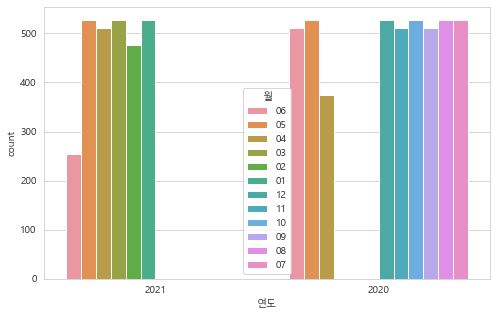

<AxesSubplot:xlabel='count', ylabel='연도'>

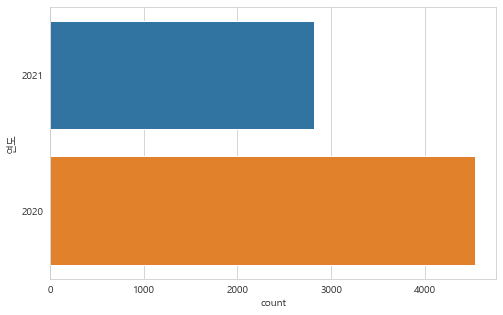

In [306]:
'''
countplot
– 항목별 갯수를 세어주는 countplot 입니다.

'''

# 차트 그리기(범주형)
sns.countplot(x='연도',hue='월', data=df) #세로방향
plt.show()
sns.countplot(y='연도', data=df)

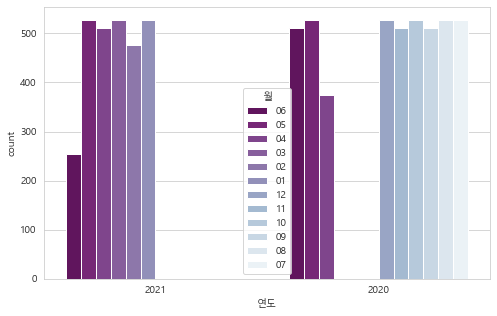

In [312]:
# palette 설정
sns.countplot(x='연도',hue='월', palette='BuPu_r', data=df) #세로방향
plt.show()

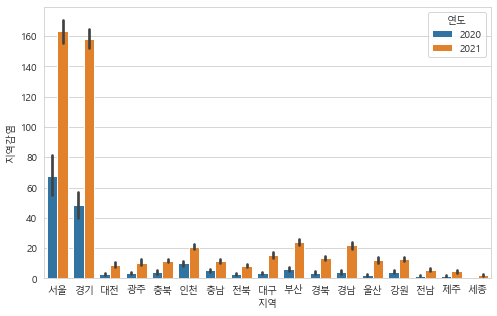

<AxesSubplot:xlabel='지역감염', ylabel='지역'>

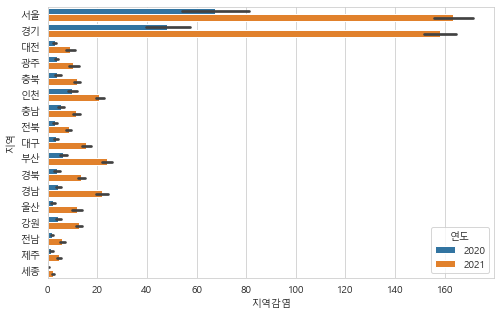

In [341]:
'''
막대그래프 (barplot)
'''
df_s=df.sort_values('지역감염',ascending=False)
sns.barplot(x='지역',y='지역감염',hue='연도', data=df_s) # 세로막데
plt.show()

sns.barplot(y='지역',x='지역감염',hue='연도', data=df_s) #가로막대

<AxesSubplot:xlabel='지역', ylabel='확진자수'>

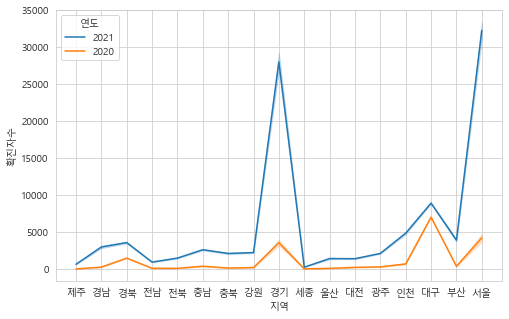

In [369]:
#라인차트 그리기
sns.lineplot(x='지역',y='확진자수',hue='연도', data=df)

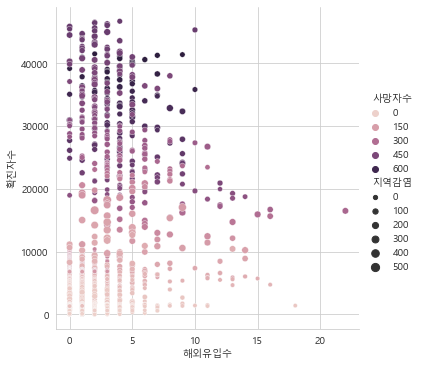

In [372]:
'''
relplot
산점도는 2개 이상의 연속형 변수를 비교할 때 편리
'''
sns.relplot(x='해외유입수',y='확진자수', size='지역감염',hue='사망자수',data=df)

In [378]:
df.head()

기준일  사망자수  확진자수  지역  전일대비증감  격리자수  해외유입수  지역감염    연도   월       요일
1 2021-06-15     1  1198  제주       6  1085      0     6  2021  06  Tuesday
2 2021-06-15    20  5049  경남       3  4765      0     3  2021  06  Tuesday
3 2021-06-15    86  4822  경북       5  4617      3     2  2021  06  Tuesday
4 2021-06-15    15  1556  전남       3  1433      0     3  2021  06  Tuesday
5 2021-06-15    58  2298  전북       4  2190      0     4  2021  06  Tuesday

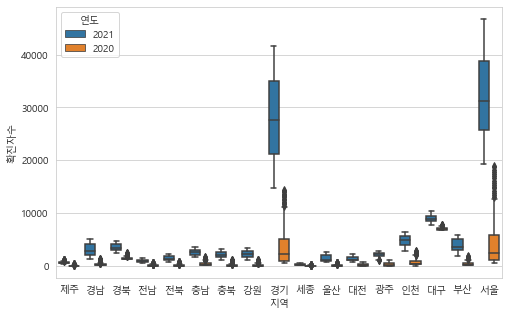

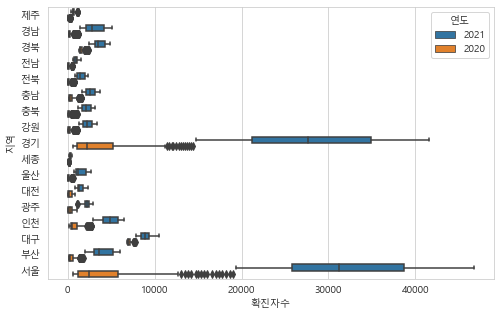

In [385]:
'''
박스플랏(boxplot)
'''
sns.boxplot(x='지역',y='확진자수', hue='연도',data=df) #가로모양
plt.show()

sns.boxplot(y='지역',x='확진자수', hue='연도',data=df) #세로모양
plt.show()


C:\Users\hmh\.conda\envs\mh\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


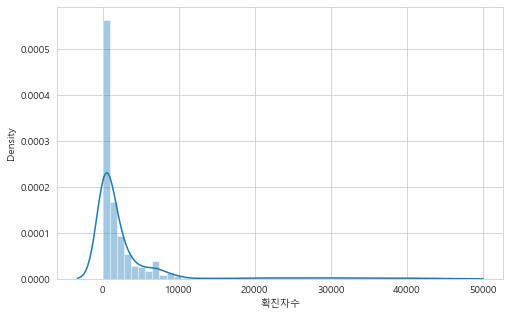

C:\Users\hmh\.conda\envs\mh\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='격리자수', ylabel='Density'>

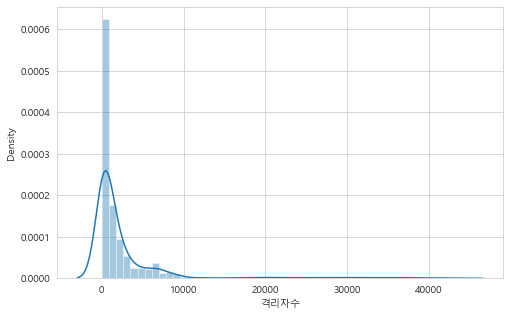

In [391]:
'''
히스토그램(distplot)

'''
sns.distplot(df['확진자수'],kde=True)
plt.show()

sns.distplot(df['격리자수'],kde=True)

In [ ]:
sns.boxplot(y='확진자수', data=df)

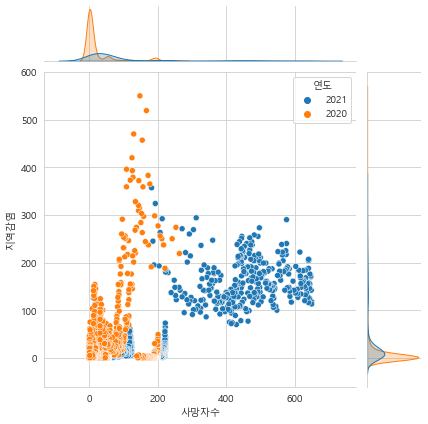

In [358]:
'''
조인트 플랏(jointplot) :산점도+분포
'''
sns.jointplot(x='사망자수',y='지역감염',hue='연도',data=df)

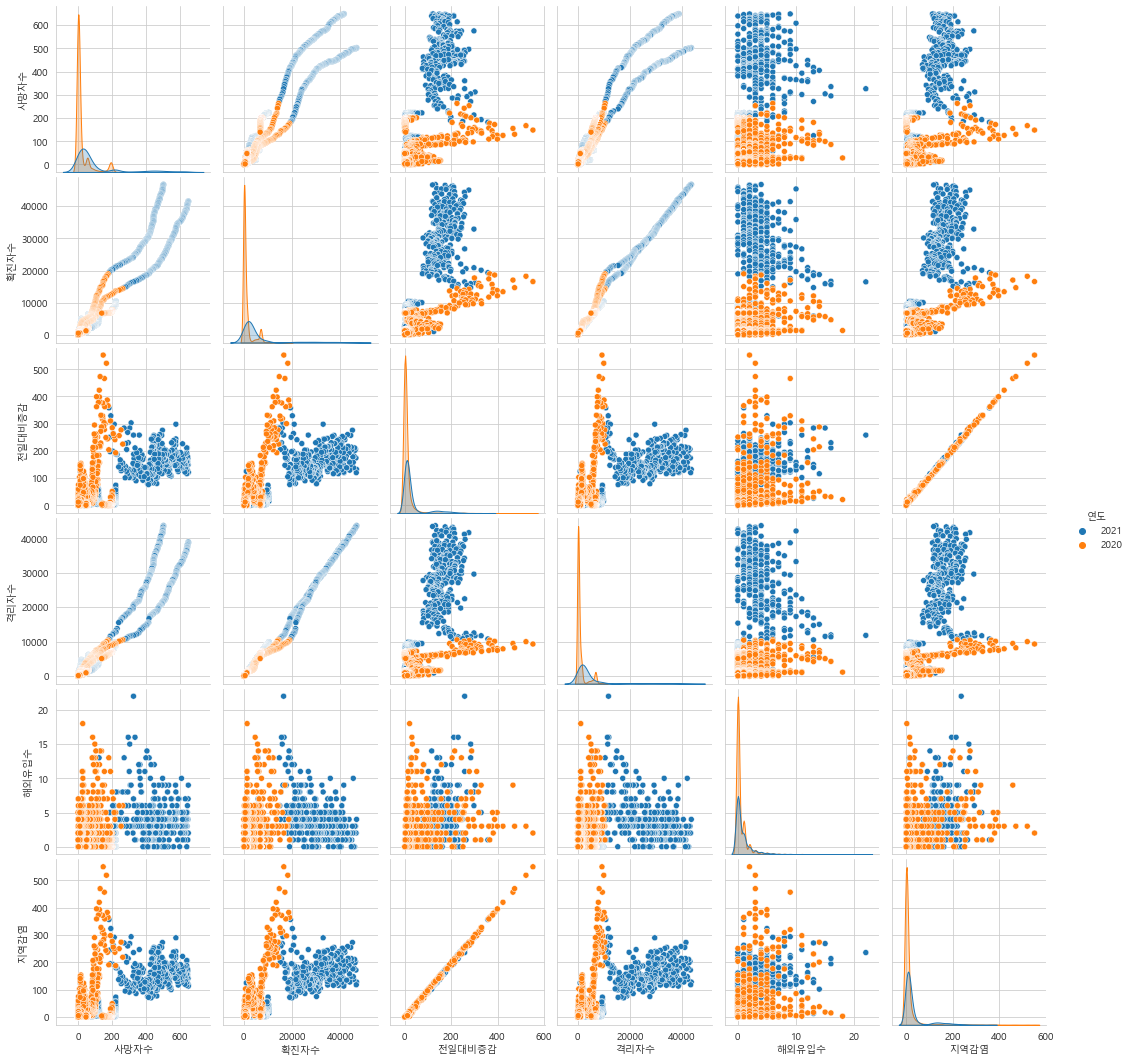

In [344]:
'''
페어플랏(pairplot)

'''
sns.pairplot(df,hue='연도')

<AxesSubplot:>

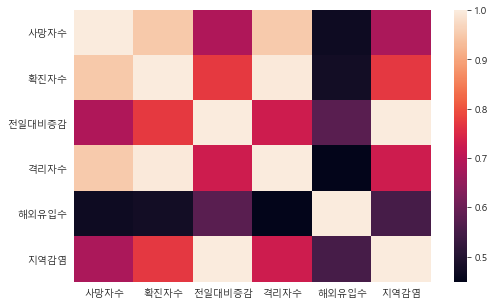

In [362]:
#히트맵(heatmap)


df_c=df.corr()
sns.heatmap(df_c)

In [162]:
df.head()

기준일  사망자수  확진자수  지역  전일대비증감  격리자수  해외유입수  지역감염    연도  \
0  2021-06-15 09:37:45.206     5  3964  검역       9  3783      9     0  2021   
1  2021-06-15 09:37:45.206     1  1198  제주       6  1085      0     6  2021   
2  2021-06-15 09:37:45.206    20  5049  경남       3  4765      0     3  2021   
3  2021-06-15 09:37:45.206    86  4822  경북       5  4617      3     2  2021   
4  2021-06-15 09:37:45.206    15  1556  전남       3  1433      0     3  2021   

    월  
0  06  
1  06  
2  06  
3  06  
4  06

Text(0.5, 1.0, '지역별 격리자 수')

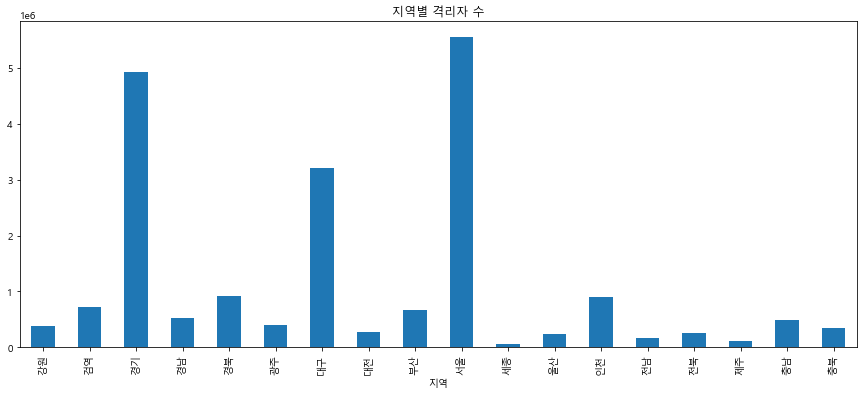

In [168]:
#### 지역단위로 그룹해서 격리자수를 합계내고 차트도 작성하여 봅니다.
df.groupby('지역')['격리자수'].sum().plot(kind='bar')
plt.title('지역별 격리자 수')

Text(0.5, 1.0, '지역별 격리자 수')

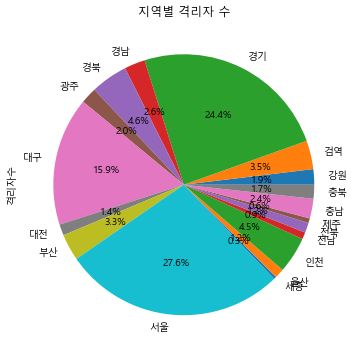

In [170]:
### 원차트로도 작성하세요.



df.groupby('지역')['격리자수'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('지역별 격리자 수')




In [171]:
df.groupby('지역')['격리자수'].sum()

지역
강원     385852
검역     714796
경기    4917637
경남     518471
경북     922973
광주     405049
대구    3208159
대전     277271
부산     665381
서울    5555457
세종      60935
울산     238563
인천     905787
전남     172183
전북     249957
제주     113325
충남     492407
충북     347133
Name: 격리자수, dtype: int32

Text(0.5, 1.0, '지역별 격리자 수')

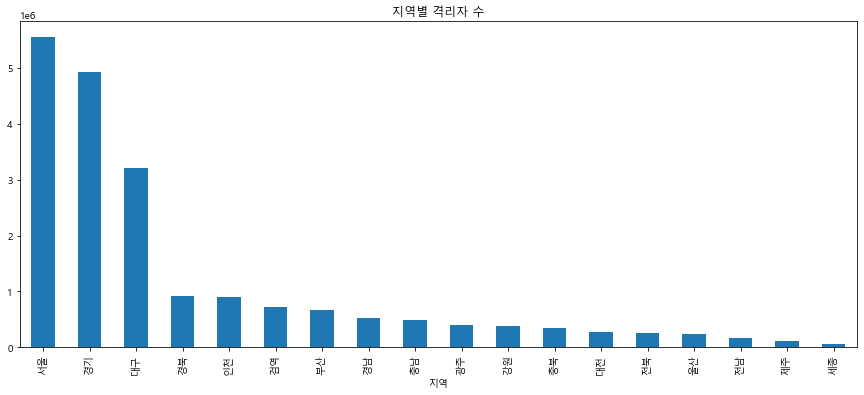

In [173]:
###합계가 많은 순으로 정리하고 차트를 다시 작성세요.



df.groupby('지역')['격리자수'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('지역별 격리자 수')




In [176]:
#지역별 확진자 수의 기술통계(descfibe)확인
df.groupby('지역').describe().stack(0)

25%    50%     75%  count     max        mean   min          std
지역                                                                          
강원 격리자수    64.0  256.0  1714.0  433.0  3191.0  891.113164  24.0   992.509438
   사망자수     3.0    3.0    41.0  433.0    51.0   18.233256   1.0    19.460397
   전일대비증감   0.0    4.0    13.0  433.0    55.0    7.669746   0.0     9.448909
   지역감염     0.0    4.0    12.0  433.0    55.0    7.457275   0.0     9.366689
   해외유입수    0.0    0.0     0.0  433.0     3.0    0.212471   0.0     0.486990
...         ...    ...     ...    ...     ...         ...   ...          ...
충북 사망자수     0.0    3.0    58.0  433.0    69.0   23.413395   0.0    28.373868
   전일대비증감   0.0    2.0    11.0  433.0   103.0    7.198614   0.0    10.389957
   지역감염     0.0    2.0    10.0  433.0   103.0    6.900693   0.0    10.279737
   해외유입수    0.0    0.0     0.0  433.0     4.0    0.297921   0.0     0.617207
   확진자수    72.0  205.0  1746.0  433.0  3162.0  932.048499  45.0  1032.035899

[108 rows x 8 columns]

In [ ]:
d

In [191]:
#지역별, 연도, 월별 해외 유입수 합계 

df.groupby(['연도','월','지역'])['해외유입수'].agg(['sum','mean','max','min','count'])

sum      mean  max  min  count
연도   월  지역                                
2020 04 강원    2  0.090909    1    0     22
        검역  108  4.909091   18    1     22
        경기   33  1.500000    6    0     22
        경남    1  0.045455    1    0     22
        경북    1  0.045455    1    0     22
...         ...       ...  ...  ...    ...
2021 06 전남    0  0.000000    0    0     15
        전북    2  0.133333    1    0     15
        제주    4  0.266667    2    0     15
        충남    8  0.533333    2    0     15
        충북    2  0.133333    1    0     15

[270 rows x 5 columns]

### 실습

In [394]:
plt.rcParams['figure.figsize'] = (15, 6)

<AxesSubplot:xlabel='지역', ylabel='확진자수'>

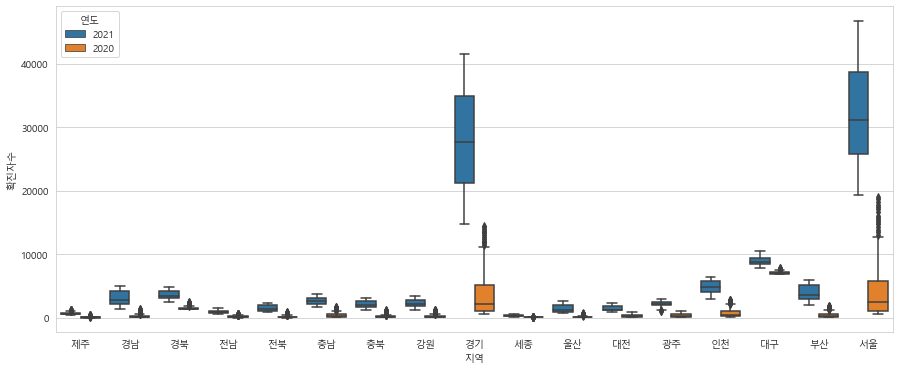

In [397]:
# 지역별, 확진자 수 연도별 비교
sns.boxplot(x='지역',y='확진자수',hue='연도',data=df)

<AxesSubplot:xlabel='요일', ylabel='확진자수'>

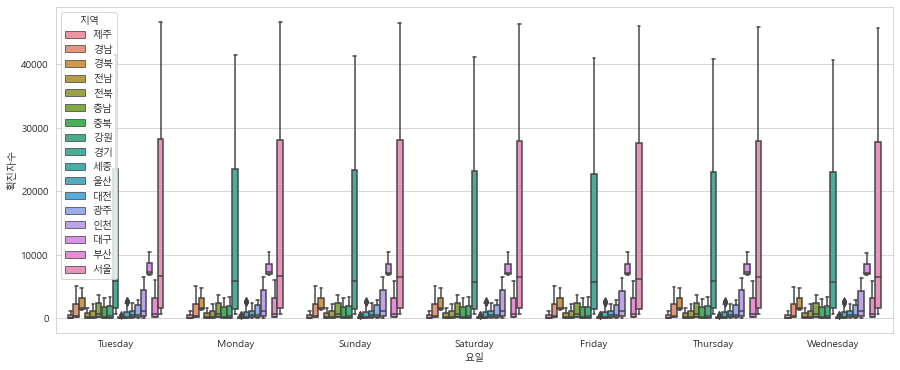

In [399]:
# 요인별, 확진자 수 연도별 비교
sns.boxplot(x='요일',y='확진자수',hue='지역',data=df)

# 지역별로 분리하여서 각 값들의  boxplot확인하기

--------- 제주 -----------


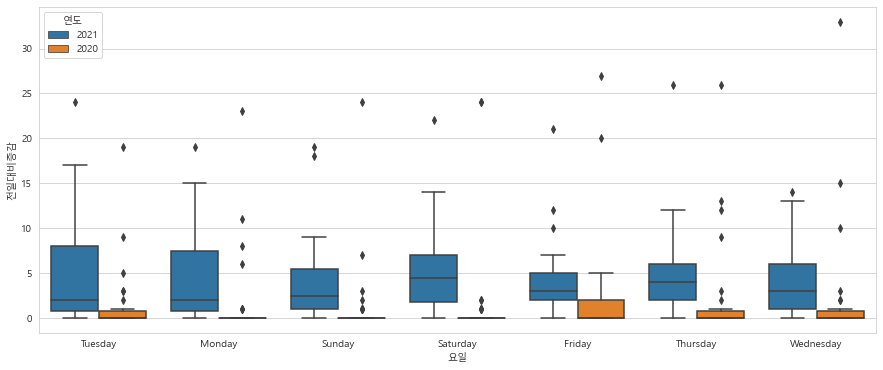

--------- 경남 -----------


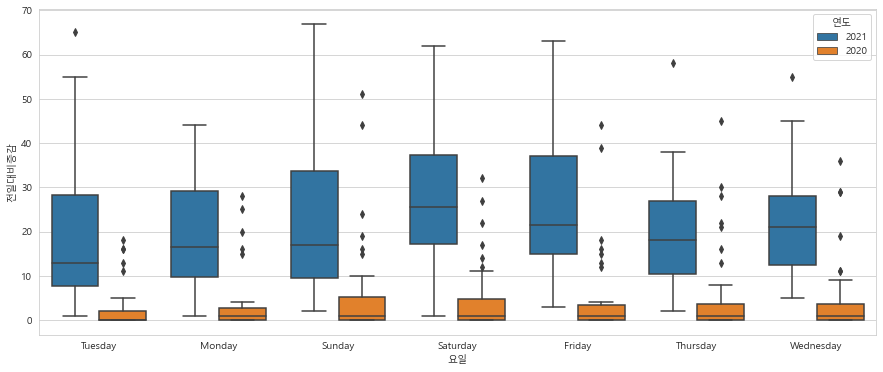

--------- 경북 -----------


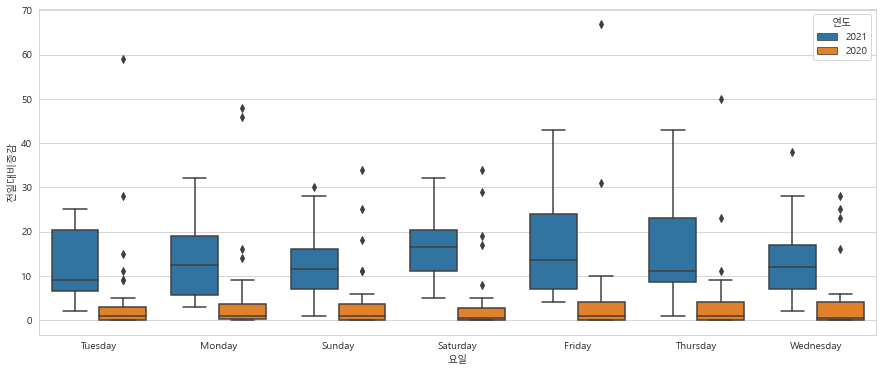

--------- 전남 -----------


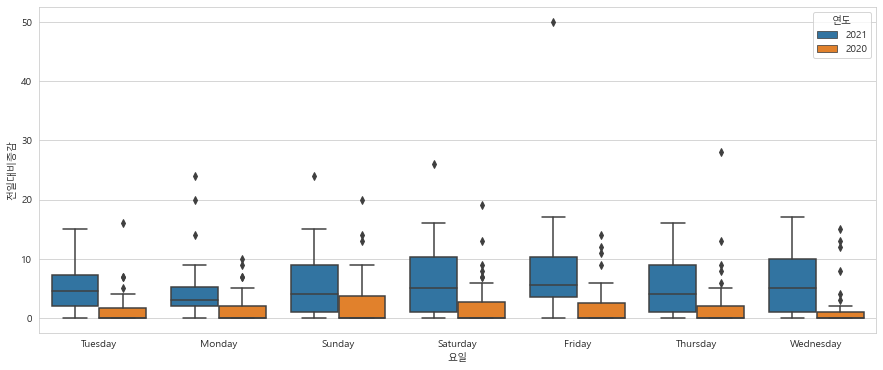

--------- 전북 -----------


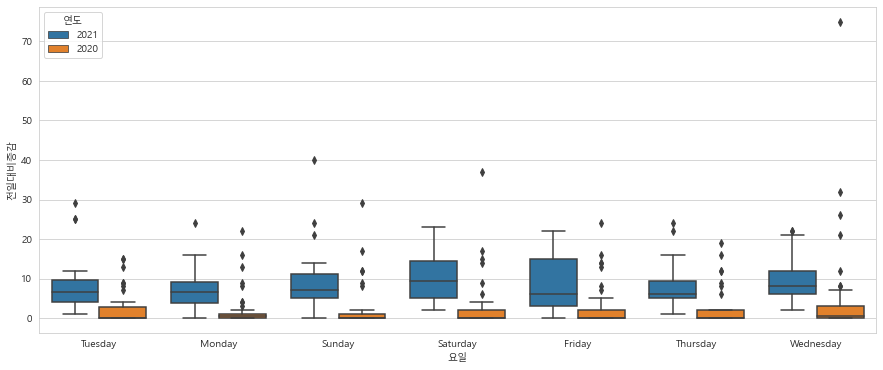

--------- 충남 -----------


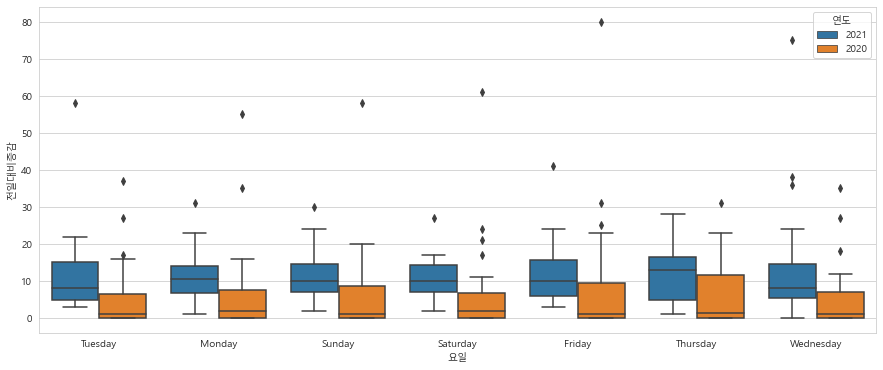

--------- 충북 -----------


--------- 강원 -----------


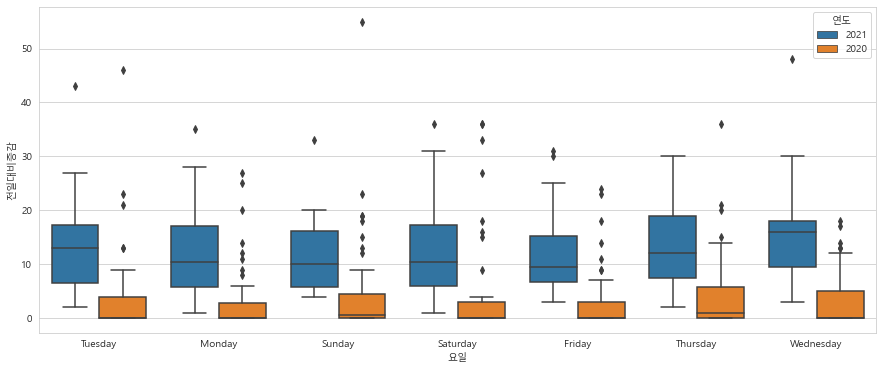

--------- 경기 -----------


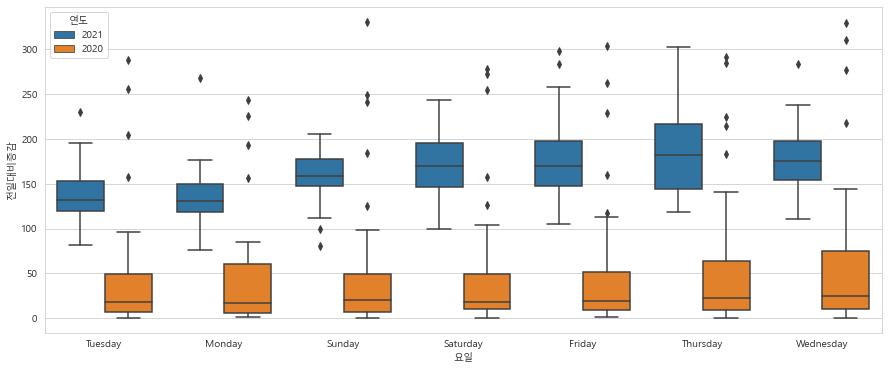

--------- 세종 -----------


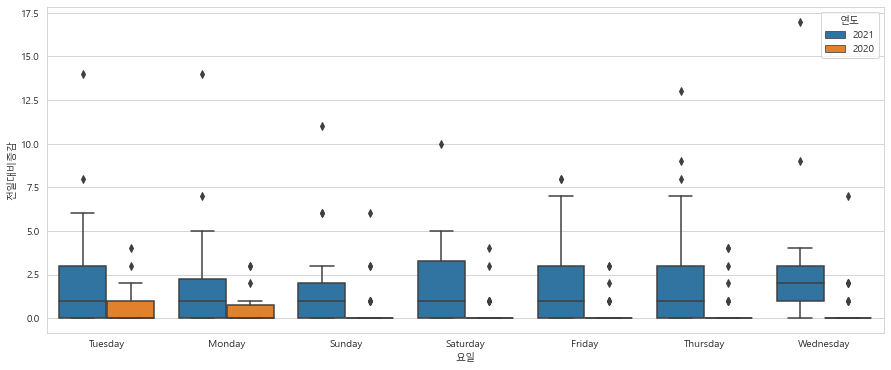

--------- 울산 -----------


--------- 대전 -----------


--------- 광주 -----------


--------- 인천 -----------


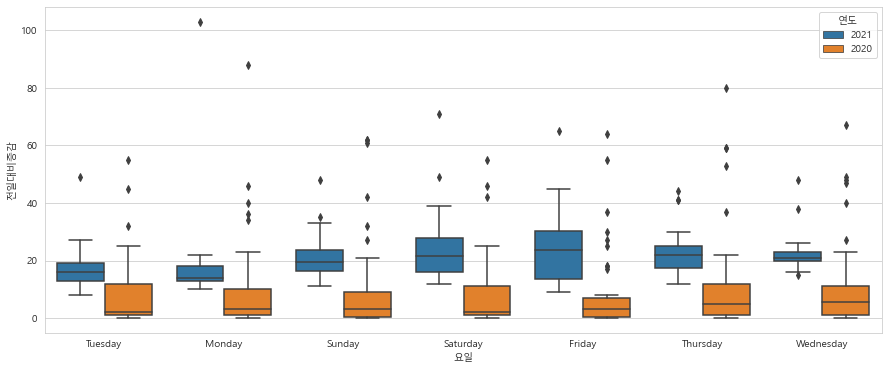

--------- 대구 -----------


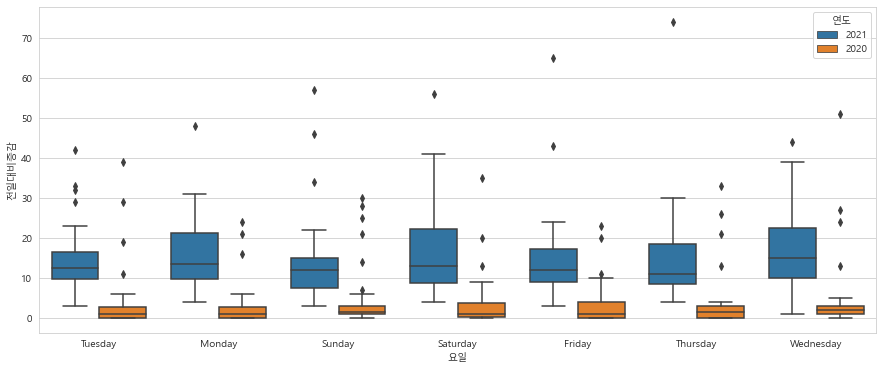

--------- 부산 -----------


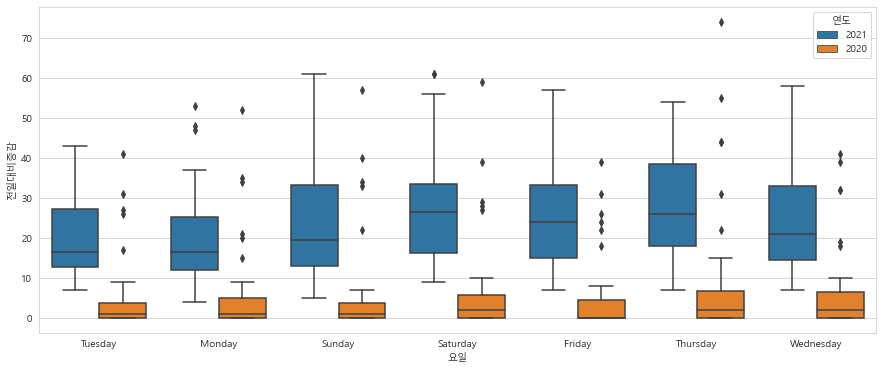

--------- 서울 -----------


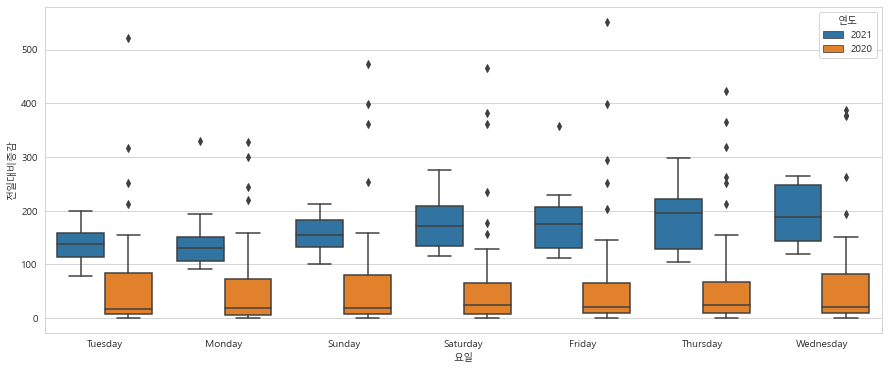

In [412]:
item=df['지역'].unique()
item
for i in item:
    tmp=df[df['지역']==i]
    print(f'--------- {i} -----------')
    sns.boxplot(x='요일',y='전일대비증감', hue='연도', data=tmp)
    plt.show()

# ▶지역별 이용하여 집계하고 차트화


In [419]:
tmp=df.groupby('지역').sum()
tmp

사망자수     확진자수  전일대비증감     격리자수  해외유입수   지역감염
지역                                                
강원    7895   440390    3321   385852     92   3229
경기  101568  5612225   40958  4917637   1805  39145
경남    2363   580483    4936   518471    194   4742
경북   26926  1004943    3500   922973    229   3272
광주    3667   446189    2845   405049    148   2697
대구   86147  3367155    3656  3208159    195   3461
대전    3503   310362    2326   277271     56   2270
부산   19917   764666    5828   665381    209   5619
서울   76328  6490745   46096  5555457    955  45135
세종     169    66933     467    60935     31    436
울산    6804   277696    2643   238563    102   2541
인천   10315  1006240    6377   905787    276   6100
전남    1757   200315    1542   172183     83   1459
전북    8740   288927    2281   249957    128   2153
제주     125   127581    1186   113325     45   1141
충남    6728   553081    3525   492407    223   3302
충북   10138   403577    3117   347133    129   2988

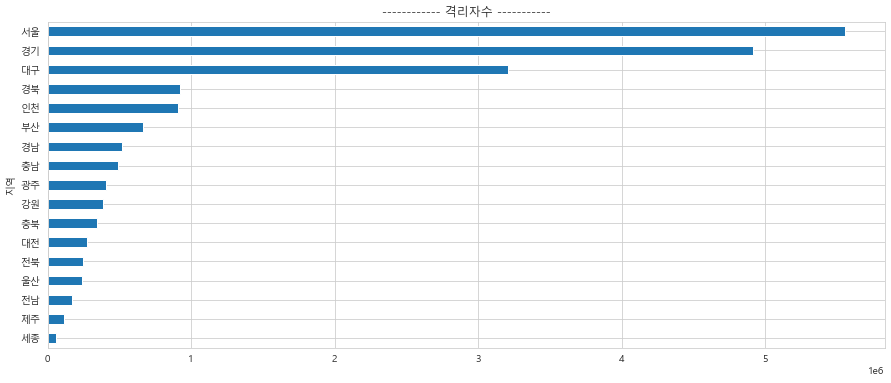

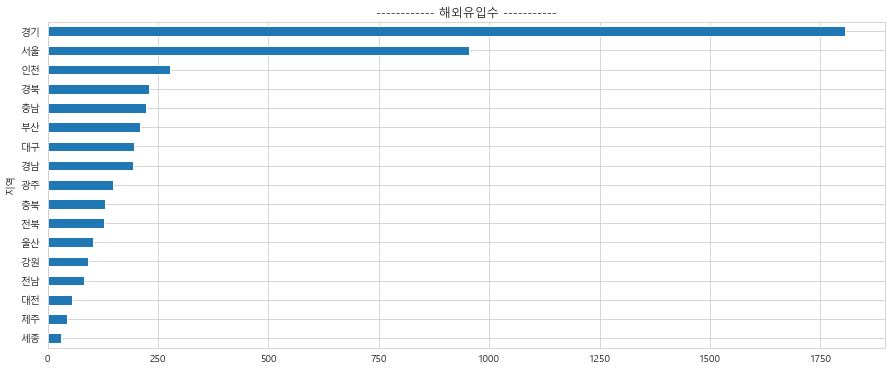

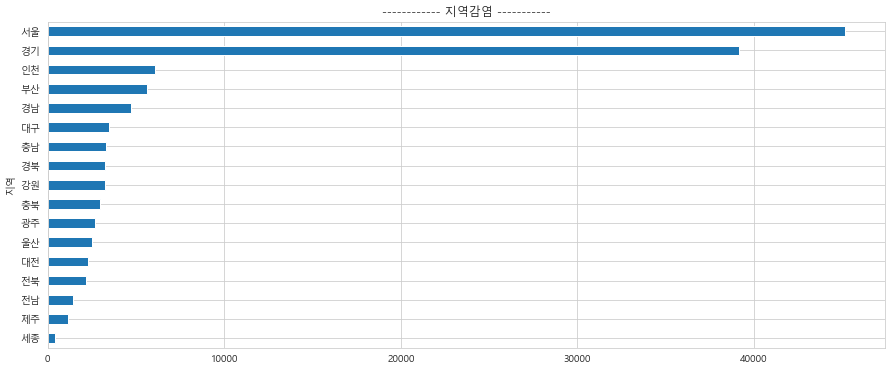

In [422]:
#지역별 집계한 데이터 각 항목별 차트 그리기
item=tmp.columns

for i in item:
    tmp[i].sort_values().plot(kind='barh')
    plt.title(f'------------ {i} -----------')
    plt.show()

In [428]:
# 확진자, 지역감염, 해외유입의 상관도를 확인해보자
# https://jfun.tistory.com/217?category=828812
sns.pairplot(df, vars=['확진자수', '지역감염', '해외유입수'], kind='reg', height=3)

## ▶날짜데이터를 이용한 자료의 변화량 확인
- seaboarn 패키지의 라인플롯을 그리면 신뢰구간 영역을 포함해서 그려줌

In [191]:
newDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5083 entries, 1 to 5679
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지역      5083 non-null   object        
 1   기준일     5083 non-null   datetime64[ns]
 2   격리자수    5083 non-null   int32         
 3   확진자수    5083 non-null   int32         
 4   전일대비증감  5083 non-null   int32         
 5   지역감염    5083 non-null   int32         
 6   해외유입    5083 non-null   int32         
 7   요일      5083 non-null   object        
dtypes: datetime64[ns](1), int32(5), object(2)
memory usage: 418.1+ KB


In [431]:
plt.figure(figsize = (15,5))
sns.lineplot(x='기준일',y='확진자수',data=df)

<AxesSubplot:xlabel='기준일', ylabel='확진자수'>

------------제주---------


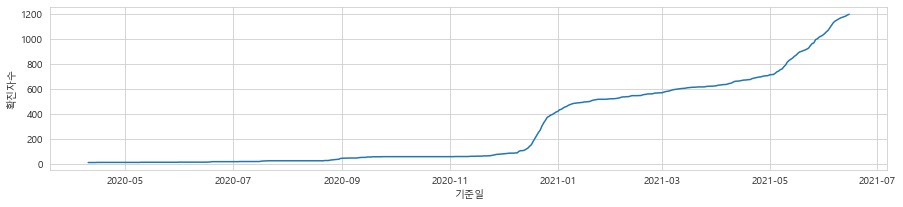

------------경남---------


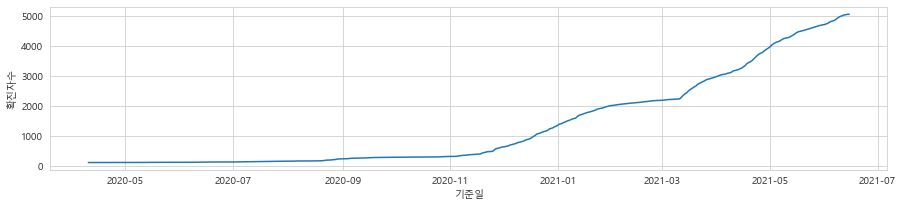

------------경북---------


------------전남---------


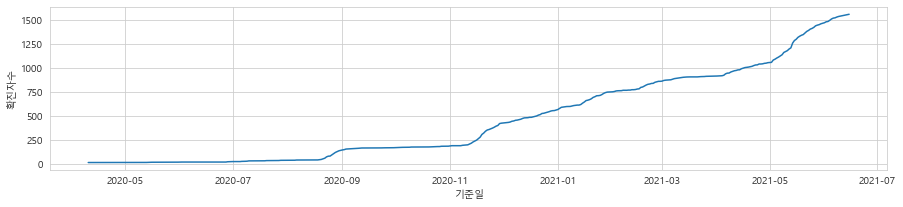

------------전북---------


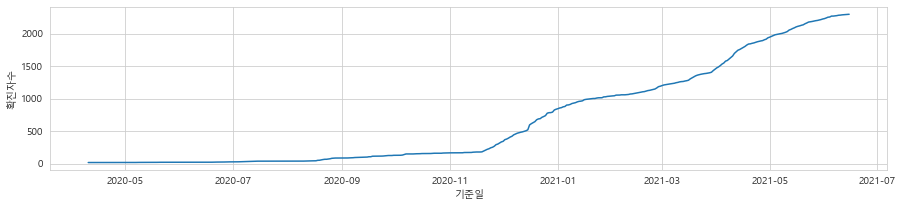

------------충남---------


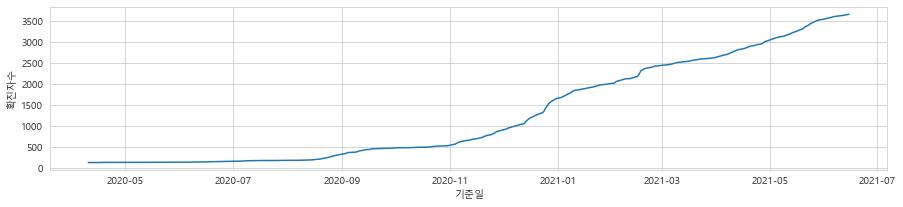

------------충북---------


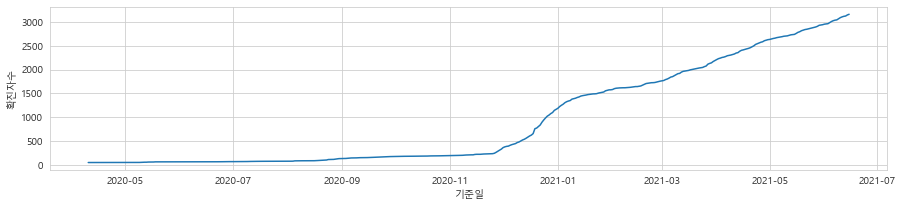

------------강원---------


------------경기---------


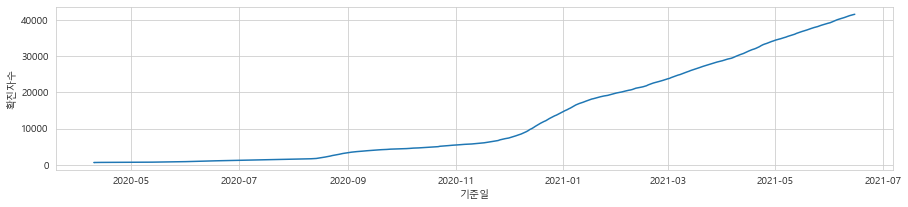

------------세종---------


------------울산---------


------------대전---------


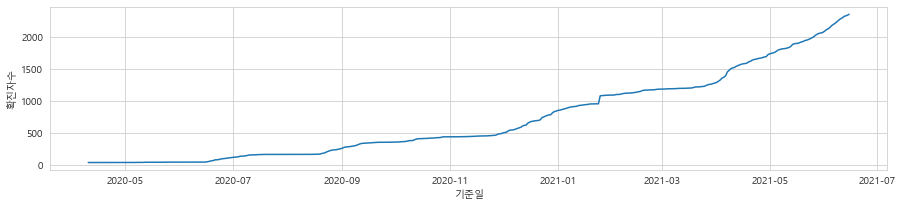

------------광주---------


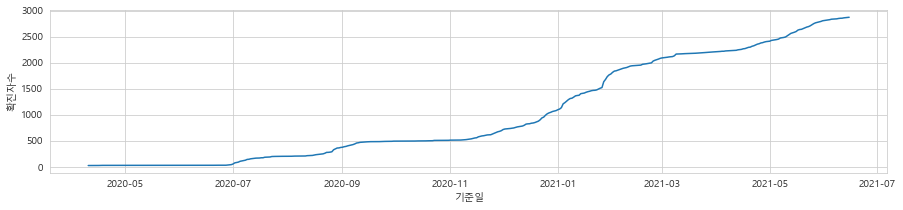

------------인천---------


------------대구---------


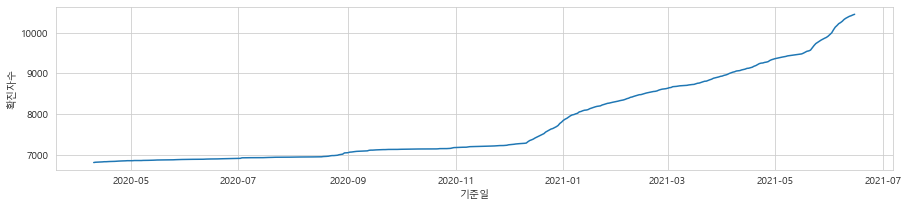

------------부산---------


------------서울---------


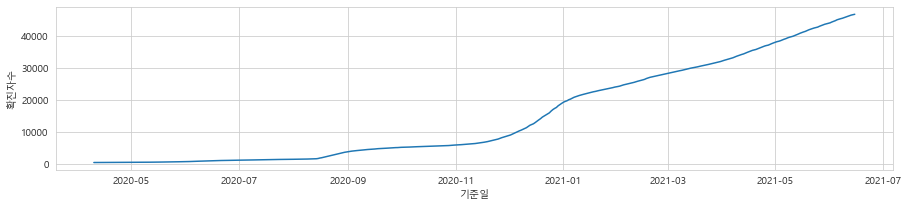

In [435]:
# 지역단위로 그리기
itemList=df['지역'].unique()

for item in itemList:
    plt.figure(figsize = (15,3))
    tmp=df[df['지역']==item]
    print('------------%s---------'%item)
    sns.lineplot(x='기준일',y='확진자수',data=tmp)
    plt.show()

------------제주---------


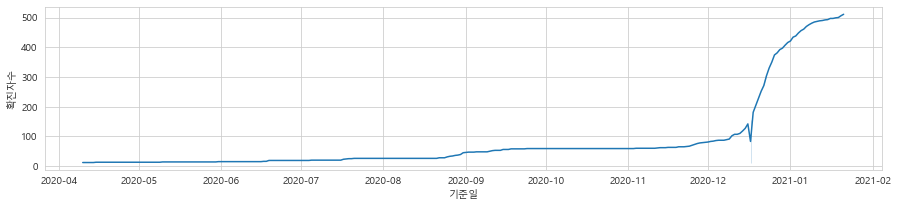

------------경남---------


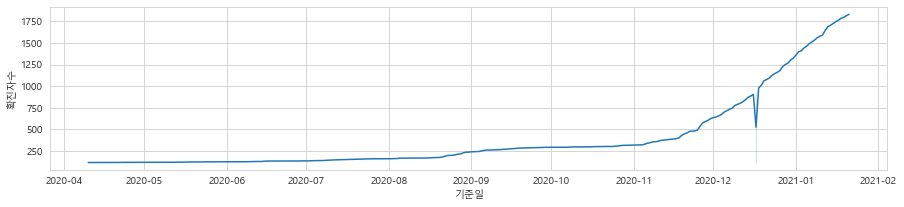

------------경북---------


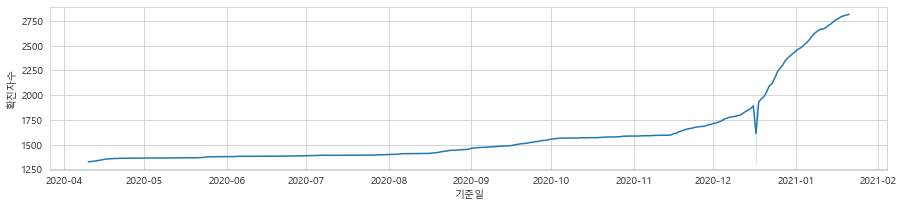

------------전남---------


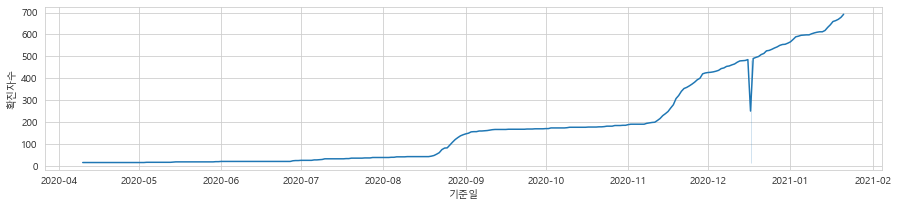

------------전북---------


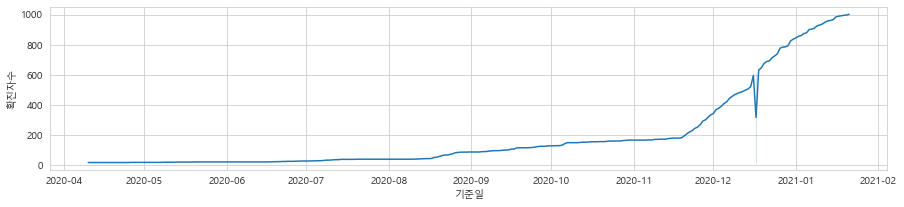

------------충남---------


------------충북---------


------------강원---------


------------경기---------


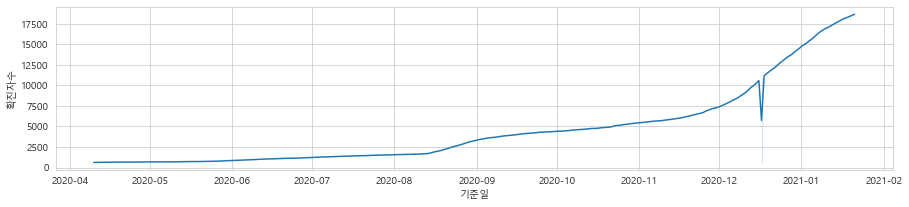

------------세종---------


------------울산---------


------------대전---------


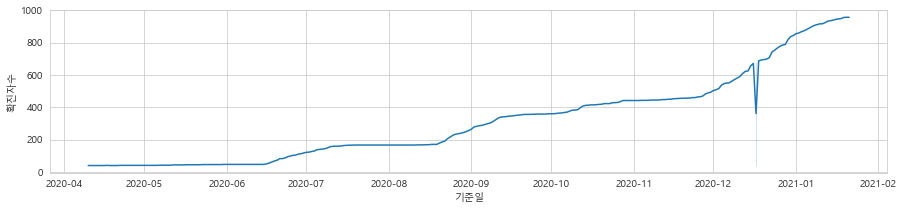

------------광주---------


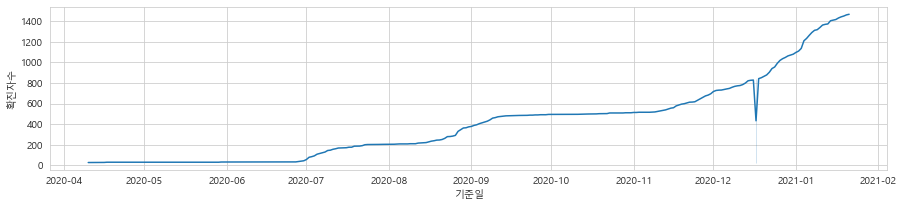

------------인천---------


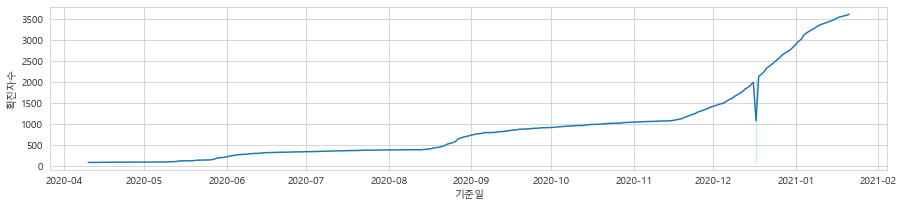

------------대구---------


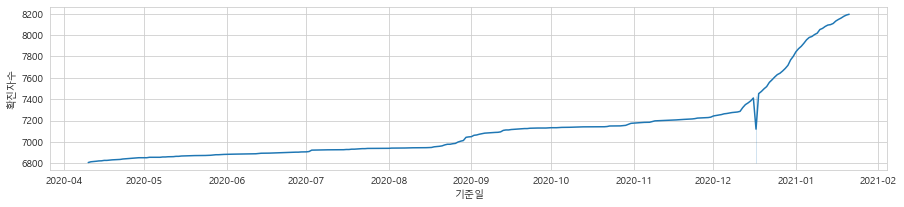

------------부산---------


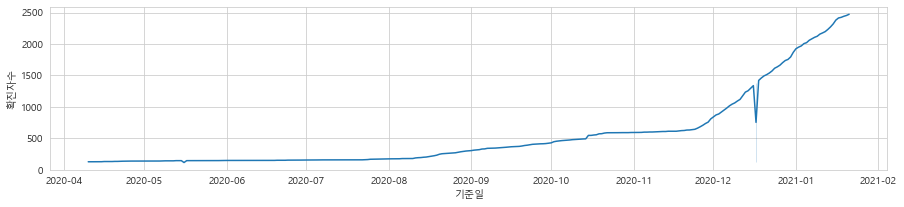

------------서울---------


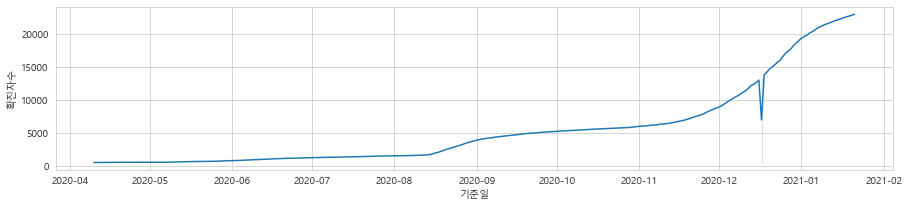

In [261]:
# 지역단위로 그리기
itemList=newDf['지역'].unique()

for item in itemList:
    plt.figure(figsize = (15,3))
    tmp=newDf[newDf['지역']==item]
    print('------------%s---------'%item)
    sns.lineplot(x='기준일',y='확진자수',data=tmp)
    plt.show()